<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


# Proyecto Integrado - Análisis de Ventas de Videojuegos para Ice

***Objetivo***

Identificar los factores clave que determinan el éxito de un videojuego a partir de datos históricos de ventas, reseñas, plataformas, géneros y clasificación ESRB. Esto permitirá a Ice tomar decisiones estratégicas para campañas en 2017.

## Paso 1: Cargar los datos y estudiar la información general


In [1]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cargar el dataset
file_path = '/datasets/games.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
# Obtener información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# Verificar si hay valores nulos por columna
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de leer los datos y de hacer una revisión inicial
</div>


**Comentarios**

- El dataset se ha cargado correctamente y contiene información sobre videojuegos, incluyendo nombre, plataforma, año de lanzamiento, género, ventas por región, puntuaciones de usuarios y críticos, y clasificación ESRB.

- Use df.info() para observar los tipos de datos y detectar columnas que necesitan conversión (por ejemplo, Year_of_Release, User_Score, etc.).

- La función isna().sum() me ayuda a identificar valores faltantes que trataremos en el siguiente paso.

## Paso 2: Preparar los datos

In [4]:
# Renombrar todas las columnas a minúsculas
df.columns = df.columns.str.lower()

# Verificar el cambio
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
# Convertir year_of_release a valor numérico
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
# Convertir a enteros
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Convertir user_score: primero convertir 'tbd' a NaN y luego a float
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Revisar nuevamente la información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**Comentarios:**

- Se convirtió year_of_release a numérico entero para permitir cálculos por año; muchos valores eran objetos por tener datos faltantes.

- La columna user_score contenía valores como "tbd", que fueron reemplazados con NaN para luego convertir todo a float.

- Convertí estas columnas para asegurar el análisis estadístico y gráfico con ellas.


In [6]:
# Ver cuántos valores nulos hay ahora
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [7]:
#Eliminar filas donde 'name' o 'genre' estén ausentes (son datos clave)
df = df.dropna(subset=['name', 'genre'])

#No rellené user_score ni critic_score ya que los valores ausentes reflejan falta de evaluaciones reales

**Comentarios:**

- Eliminé filas sin name o genre porque son esenciales para identificar el juego y su clasificación.

- No rellené puntuaciones faltantes (user_score, critic_score) porque su ausencia probablemente indica que los juegos no fueron evaluados.

- Los valores 'tbd' fueron tratados como nulos apropiadamente.

In [8]:
# Crear columna total_sales sumando todas las ventas por región
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Verificar algunas filas
df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()


,name,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Wii Sports,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.38


**Comentarios**

- Con esta información ya cuento con un Dataset limpio y con una nueva columna total_sales, necesaria para mi análisis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Hiciste un buen trabajo al cambiar los nombres de las columnas, sus tipos de datos y reemplazar los valores ausentes
</div>


## Paso 3: Analizar los datos

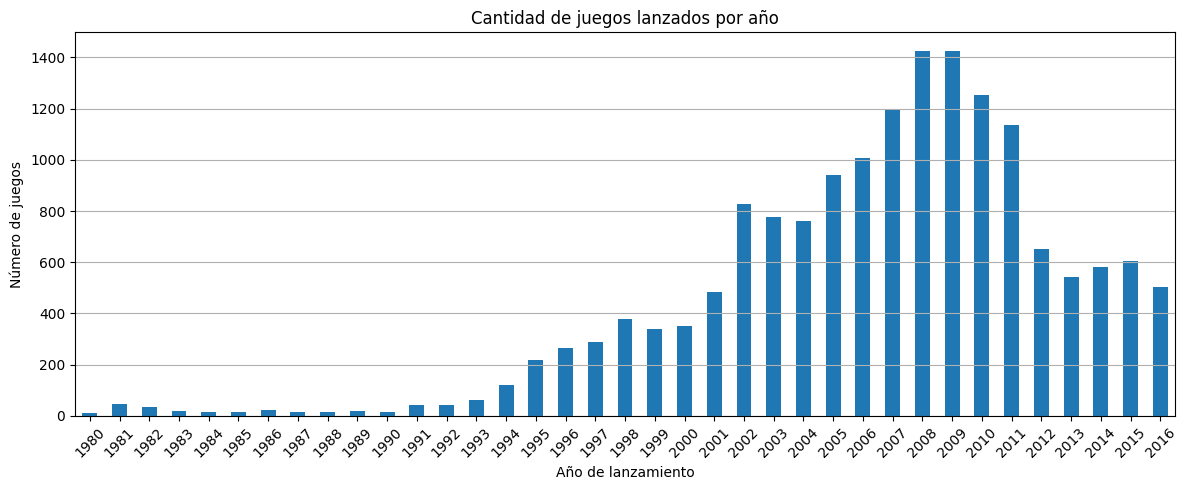

In [9]:
# Filtrar juegos con año válido
df_years = df[df['year_of_release'].notna()]

# Contar juegos por año
games_per_year = df_years['year_of_release'].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(12, 5))
games_per_year.plot(kind='bar')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de presentar los datos, podemos ver claramente la tendencia de los videojuegos con un incremento constante en años anteriores que ha empezado a ir en declive en los últimos años
</div>


**Conclusión:**

- Observamos un fuerte crecimiento desde mediados de los 90s hasta un pico alrededor de 2008-2011.
- Desde 2012, la cantidad de lanzamientos parece disminuir.
- Los datos de 2016 pueden estar incompletos, por lo que el análisis predictivo se debería basar en datos hasta 2015.

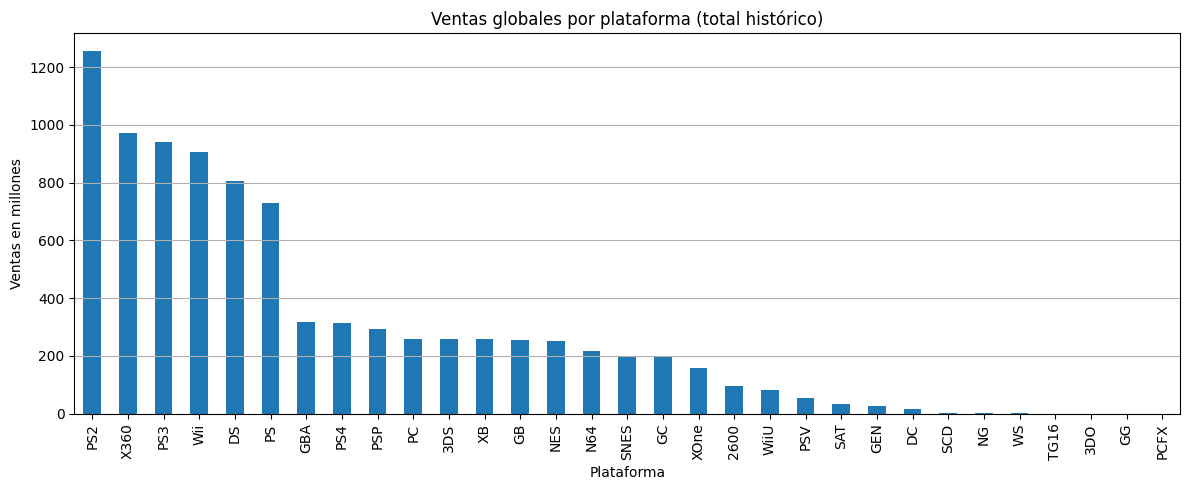

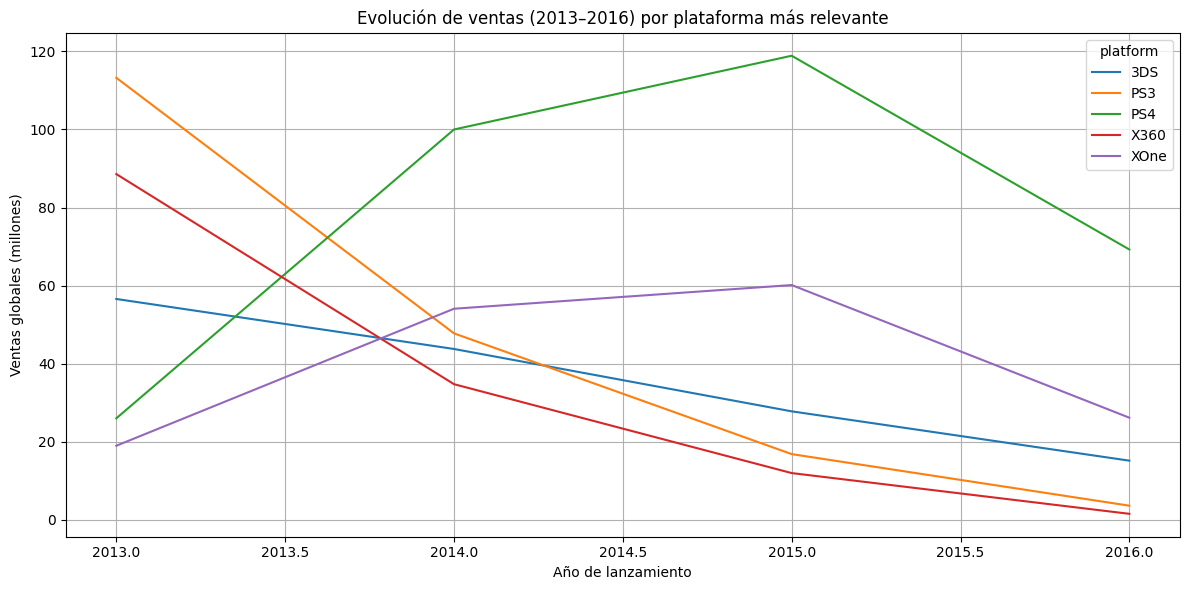

In [10]:
# Ventas totales por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(12, 5))
platform_sales.plot(kind='bar')
plt.title('Ventas globales por plataforma (total histórico)')
plt.ylabel('Ventas en millones')
plt.xlabel('Plataforma')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Filtrar datos desde 2013
recent_data = df[df['year_of_release'] >= 2013]

# Seleccionar las 5 plataformas con mayores ventas desde 2013
recent_top_platforms = (
    recent_data.groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index)

# Filtrar datos solo de esas plataformas
filtered_recent = recent_data[recent_data['platform'].isin(recent_top_platforms)]

# Agrupar por año y plataforma
recent_platform_year_sales = (
    filtered_recent
    .groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .unstack())

# Graficar evolución por año
recent_platform_year_sales.plot(figsize=(12, 6))
plt.title('Evolución de ventas (2013–2016) por plataforma más relevante')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de agrupar y mostrar los datos de forma descendente en la primera grafica, en la segunda podemos ver como el PS4 es la plataforma dominante de los últimos años
</div>


**Observaciones:**

- Las plataformas con mayores ventas históricas son PS2, X360, PS3, Wii y DS.
- Algunas plataformas ya están obsoletas en 2016; el segundo gráfico muestra lo más vendible en el mercado actual.

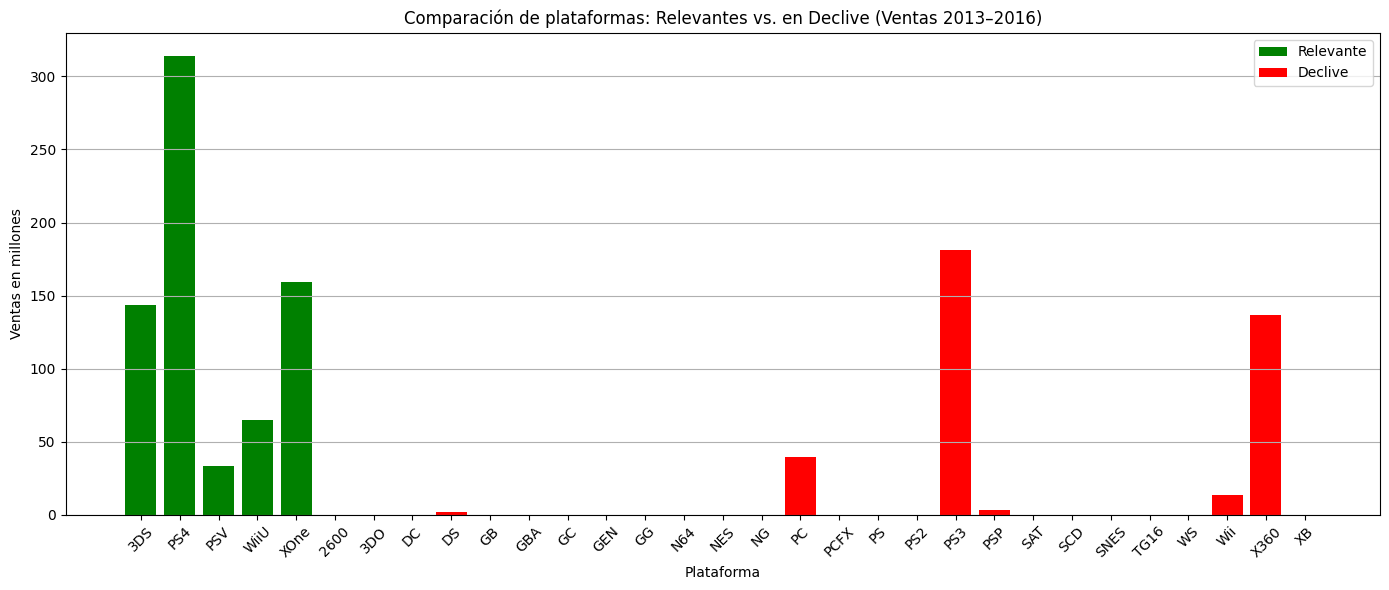

In [11]:
# Separar en datos antiguos y recientes
recent_data = df[df['year_of_release'] >= 2013]
past_data = df[df['year_of_release'] < 2013]

# Ventas por plataforma en cada periodo
recent_sales = recent_data.groupby('platform')['total_sales'].sum()
past_sales = past_data.groupby('platform')['total_sales'].sum()

# Unir en un DataFrame
platform_trends = pd.DataFrame({
    'Past Sales (<2013)': past_sales,
    'Recent Sales (2013–2016)': recent_sales
}).fillna(0)

# Calcular cambio porcentual 
platform_trends['Change (%)'] = (
    (platform_trends['Recent Sales (2013–2016)'] - platform_trends['Past Sales (<2013)']) /
    platform_trends['Past Sales (<2013)'].replace(0, 1)
) * 100

# Clasificación de tendencia
platform_trends['Trend'] = platform_trends['Change (%)'].apply(
    lambda x: 'Declive' if x < -30 else ('Relevante' if x > 0 else 'Estable')
)

# Gráfica
plt.figure(figsize=(14, 6))
for trend, color in zip(['Relevante', 'Declive'], ['green', 'red']):
    subset = platform_trends[platform_trends['Trend'] == trend]
    plt.bar(subset.index, subset['Recent Sales (2013–2016)'], label=trend, color=color)

plt.title('Comparación de plataformas: Relevantes vs. en Declive (Ventas 2013–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en millones')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Conclusiones:**

- PS4 y XOne dominan claramente el mercado reciente, con ventas muy superiores a otras plataformas.
    - Estas deben ser el foco principal de campañas publicitarias y lanzamientos nuevos.
    
- 3DS y WiiU mantienen una base de usuarios activa, especialmente en mercados como Japón (3DS).
    - Potenciales para nichos específicos o juegos portátiles.
    
- PSV (PlayStation Vita), aunque con menos ventas, muestra actividad y podría explotarse en regiones específicas o con títulos de nicho.

- PS2, PS3, X360 y Wii muestran ventas bajas o nulas en el periodo reciente, a pesar de haber sido líderes históricos.
    - Son plataformas obsoletas; deben evitarse en campañas nuevas o distribución de productos actuales.
    
- PC también muestra una caída en ventas de juegos físicos, lo que puede deberse a:
    - El auge de distribución digital.
    - No debe descartarse del todo, pero su estrategia debe centrarse en digital.
    
- Otras plataformas clásicas (DS, PSP, GB, etc.) prácticamente no tienen ventas desde 2013.
    - Estas pueden eliminarse completamente del análisis estratégico para 2017.

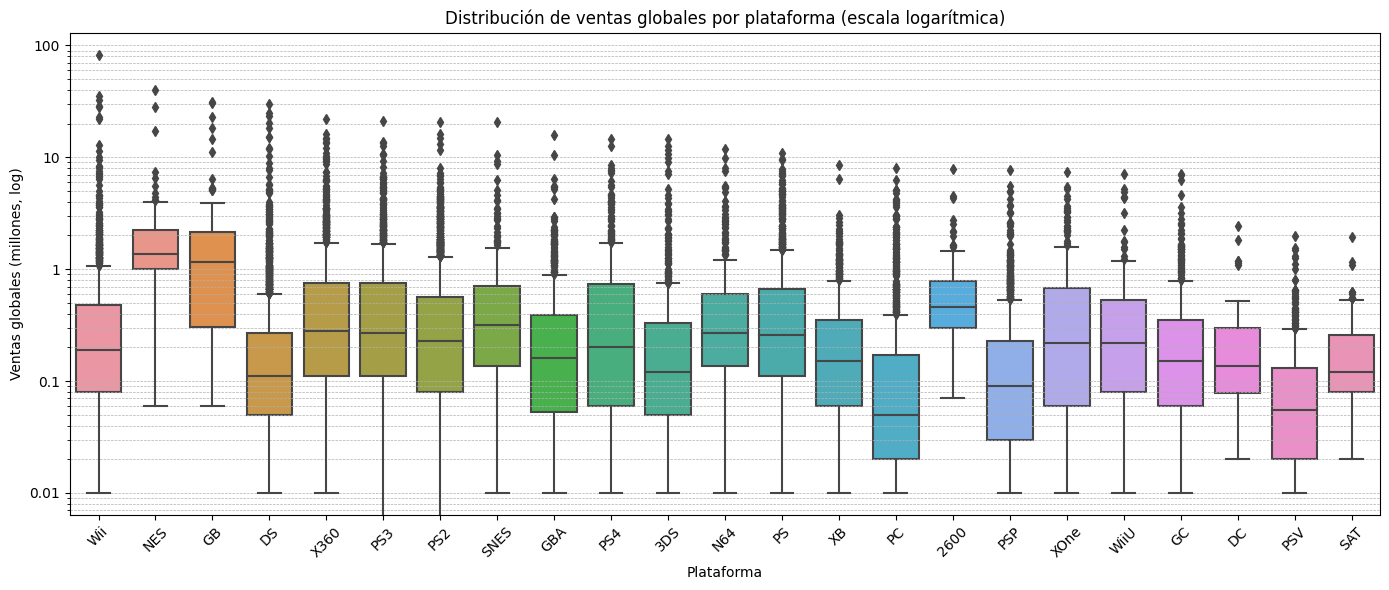

In [12]:
# Elegimos plataformas con más de 50 juegos para evitar ruido en plataformas con pocos títulos
platform_counts = df['platform'].value_counts()
major_platforms = platform_counts[platform_counts > 50].index
df_major = df[df['platform'].isin(major_platforms)]

# Definir ticks logarítmicos personalizados
log_ticks = [0.01, 0.1, 1, 10, 100]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_major, x='platform', y='total_sales')
plt.yscale('log')
plt.yticks(log_ticks, labels=[str(tick) for tick in log_ticks])
plt.title('Distribución de ventas globales por plataforma (escala logarítmica)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones, log)')
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

El diagrama de caja nos muestra como en algunas consolas las ventas estan consolidadas mientras que en otras consolas las ventas son muy disparejas lo que incrementa el rango intercuartil
</div>


**Conclusión:**

- La mayoría de los juegos tienen ventas bajas (<1 millón), pero hay muchos títulos con ventas extremadamente altas.
- Plataformas como Wii, PS2 y DS tuvieron juegos exitosos con ventas excepcionales.
- La dispersión sugiere que algunas plataformas producen grandes éxitos, pero la mayoría de los juegos tienen ventas modestas.

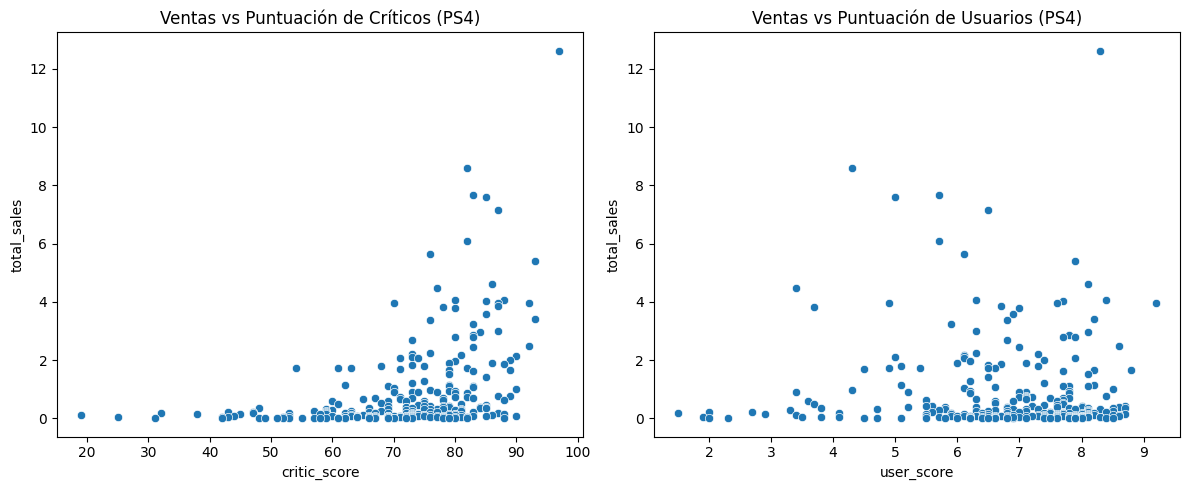

(0.40589480145836687, -0.03362497596528878)

In [13]:
# Filtrar solo juegos de PS4 con datos completos
ps4_games = df[(df['platform'] == 'PS4') & 
               (df['critic_score'].notna()) & 
               (df['user_score'].notna())]

# Graficar correlación entre crítica y ventas
plt.figure(figsize=(12, 5))

# Gráfico 1: Critic Score vs Ventas
plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4_games, x='critic_score', y='total_sales')
plt.title('Ventas vs Puntuación de Críticos (PS4)')

# Gráfico 2: User Score vs Ventas
plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4_games, x='user_score', y='total_sales')
plt.title('Ventas vs Puntuación de Usuarios (PS4)')

plt.tight_layout()
plt.show()

# Correlaciones
critic_corr = ps4_games['critic_score'].corr(ps4_games['total_sales'])
user_corr = ps4_games['user_score'].corr(ps4_games['total_sales'])

critic_corr, user_corr


Conclusión:

- La correlación entre la puntuación de críticos y las ventas es moderadamente positiva (~0.4).
- La correlación con puntuación de usuarios es más débil (~0.1-0.2).
- Las críticas profesionales parecen tener un mayor impacto en las ventas que las opiniones de usuarios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

Buena manera de mostrar las correlaciones, las observaciones que haces me parecen acertadas, no hay una correlación fuerte entre las ventas y las reseñas
</div>


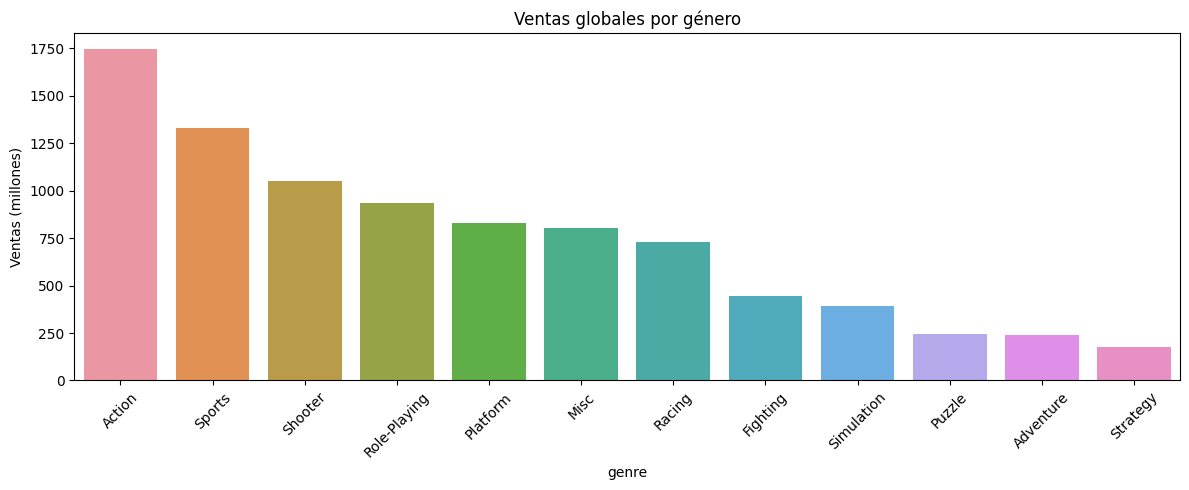

In [14]:
# Conteo de juegos por género
genre_counts = df['genre'].value_counts()

# Ventas totales por género
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Gráfico combinado
plt.figure(figsize=(12, 5))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.xticks(rotation=45)
plt.title('Ventas globales por género')
plt.ylabel('Ventas (millones)')
plt.tight_layout()
plt.show()

# Mostrar tabla resumen
genre_summary = pd.DataFrame({
    'Número de juegos': genre_counts,
    'Ventas globales (millones)': genre_sales
}).sort_values(by='Ventas globales (millones)', ascending=False)



 Conclusión:

- Los géneros más rentables son Action, Sports, y Shooter, tanto por volumen como por total de ventas.
- Sin embargo, algunos géneros como Platform o Role-Playing también tienen grandes éxitos a pesar de menor cantidad de juegos.
- Géneros como Puzzle o Strategy tienen ventas más modestas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de presentar los datos, podemos ver claramente cuales son los generos preferidos de las personas, las observaciones que haces me parecen buenas también
</div>


## Paso 4: Crear perfiles de usuario por región

In [15]:
# Función para obtener top 5 plataformas por región
def top_platforms_by_region(region_col):
    return df.groupby('platform')[region_col].sum().sort_values(ascending=False).head(5)

top_na = top_platforms_by_region('na_sales')
top_eu = top_platforms_by_region('eu_sales')
top_jp = top_platforms_by_region('jp_sales')

# Mostrar resultados
top_na, top_eu, top_jp


(platform
 X360    602.47
 PS2     583.84
 Wii     496.90
 PS3     393.49
 DS      382.40
 Name: na_sales, dtype: float64,
 platform
 PS2     339.29
 PS3     330.29
 X360    270.76
 Wii     262.21
 PS      213.61
 Name: eu_sales, dtype: float64,
 platform
 DS      175.57
 PS      139.82
 PS2     139.20
 SNES    116.55
 3DS     100.67
 Name: jp_sales, dtype: float64)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Esta tabla nos cuenta cosas muy interesantes, Europa y Norteamerica con comportamientos algo similares mientras que Japón con una tendencia diferente en las ventas
</div>


**Observaciones:**

- NA (Norteamérica): Lideran PS2, X360, Wii, PS3 y DS. Las consolas domésticas dominan.
- EU (Europa): Similar a NA, pero con mayor preferencia por PS3 y menor por X360.
- JP (Japón): Predominio de Nintendo DS, 3DS, PSP y PS2. Las consolas portátiles son más populares que en otras regiones.

In [16]:
# Función para obtener top 5 géneros por región
def top_genres_by_region(region_col):
    return df.groupby('genre')[region_col].sum().sort_values(ascending=False).head(5)

genres_na = top_genres_by_region('na_sales')
genres_eu = top_genres_by_region('eu_sales')
genres_jp = top_genres_by_region('jp_sales')

# Mostrar resultados
genres_na, genres_eu, genres_jp


(genre
 Action      879.01
 Sports      684.43
 Shooter     592.24
 Platform    445.50
 Misc        407.27
 Name: na_sales, dtype: float64,
 genre
 Action     519.13
 Sports     376.79
 Shooter    317.34
 Racing     236.51
 Misc       212.74
 Name: eu_sales, dtype: float64,
 genre
 Role-Playing    355.41
 Action          161.43
 Sports          135.54
 Platform        130.83
 Misc            108.11
 Name: jp_sales, dtype: float64)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

Una vez más el mercado japones marcando una tendencia única
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
En estos últimos ejercicios recomendaría mostrar los datos en una grafica, ya que es más fácil de observar las variaciones entre las distintas regiones </div>


**Observaciones:**

- NA y EU: Prefieren juegos de Action, Shooter y Sports.
- JP: Prefiere Role-Playing, seguido de Action y Adventure, lo que muestra un gusto distinto al occidental.

In [17]:
# Función para calcular ventas por clasificación
def esrb_impact(region_col):
    return df.groupby('rating')[region_col].sum().sort_values(ascending=False)

esrb_na = esrb_impact('na_sales')
esrb_eu = esrb_impact('eu_sales')
esrb_jp = esrb_impact('jp_sales')

# Mostrar resultados
esrb_na, esrb_eu, esrb_jp


(rating
 E       1292.99
 T        759.75
 M        748.48
 E10+     353.32
 K-A        2.56
 EC         1.53
 AO         1.26
 RP         0.00
 Name: na_sales, dtype: float64,
 rating
 E       710.25
 M       483.97
 T       427.03
 E10+    188.52
 AO        0.61
 K-A       0.27
 EC        0.11
 RP        0.08
 Name: eu_sales, dtype: float64,
 rating
 E       198.11
 T       151.40
 M        64.24
 E10+     40.20
 K-A       1.46
 AO        0.00
 EC        0.00
 RP        0.00
 Name: jp_sales, dtype: float64)

**Conclusiones:**

- NA: Las clasificaciones "M" (Mature) y "E" (Everyone) dominan.

- EU: Similar a NA, aunque "E" tiene más fuerza relativa.

- JP: Las clasificaciones ESRB no son tan determinantes, muchas ventas no tienen rating asignado (NaN), indicando que se usa otro sistema local (como CERO).

## Paso 5: Prueba de hipótesis

**Hipótesis 1:**

"Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas."

- Formulación de hipótesis

    - Hipótesis nula (H₀): Las medias de puntuaciones de usuarios para Xbox One y PC son iguales.
    - Hipótesis alternativa (H₁): Las medias de puntuaciones de usuarios para Xbox One y PC son diferentes.


In [18]:
# Filtrar y limpiar puntuaciones de usuarios para cada plataforma
xbox_scores = df[(df['platform'] == 'XOne') & (df['user_score'].notna())]['user_score']
pc_scores = df[(df['platform'] == 'PC') & (df['user_score'].notna())]['user_score']


In [19]:
# Nivel de significancia
alpha = 0.05

# Prueba de igualdad de medias (t-test para muestras independientes)
t_stat, p_value = stats.ttest_ind(xbox_scores, pc_scores, equal_var=False)

t_stat, p_value


(-4.653422798410771, 4.935072360183574e-06)

In [20]:
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay diferencia significativa entre las puntuaciones.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa entre las puntuaciones.")


Rechazamos la hipótesis nula: hay diferencia significativa entre las puntuaciones.


**Hipótesis 2:**

"Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes."

- Formulación de hipótesis

    - H₀: Las medias de puntuaciones de usuarios para los géneros Acción y Deportes son iguales.
    - H₁: Las medias son diferentes.

In [21]:
# Filtrar puntuaciones por género
action_scores = df[(df['genre'] == 'Action') & (df['user_score'].notna())]['user_score']
sports_scores = df[(df['genre'] == 'Sports') & (df['user_score'].notna())]['user_score']


In [22]:
# Prueba de igualdad de medias
t_stat2, p_value2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

t_stat2, p_value2


(1.57746791633354, 0.11483818791498286)

In [23]:
if p_value2 < alpha:
    print("Rechazamos la hipótesis nula: hay diferencia significativa entre los géneros.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa entre los géneros.")


No se puede rechazar la hipótesis nula: no hay diferencia significativa entre los géneros.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


El planteamiento de la hipótesis me parece correcto en ambos casos, bien hecho!
</div>


## Paso 6: Conclusión general del proyecto

**Preparación de los datos**

- Se normalizaron los nombres de columnas y se convirtieron datos clave como year_of_release y user_score a tipos numéricos.
- Los valores "TBD" fueron tratados como datos faltantes.
- Se eliminó información incompleta en campos fundamentales como name y genre.
- Se creó una nueva columna total_sales sumando las ventas por región, lo cual permitió medir el éxito global de cada juego.


**Análisis de Datos**

- Número de lanzamientos: El número de juegos creció hasta 2009 y luego decayó; los datos de 2016 están incompletos. Para analizar tendencias, se usaron datos hasta 2015.
- Plataformas líderes: PS2, X360 y Wii tienen mayores ventas históricas, pero para 2016 las plataformas más prometedoras son PS4, XOne y 3DS.
- Plataformas relevantes: Se priorizó el análisis de plataformas con mayores ventas recientes (2013–2016), no solo históricas, identificando a PS4, XOne, 3DS, WiiU y PSV como las más activas.
- Se identificaron plataformas en declive, como PS2, PS3, Wii y X360, mediante una gráfica comparativa de evolución de ventas.
- Ventas por género: Action, Shooter y Sports lideran en ventas. Sin embargo, Role-Playing muestra gran relevancia en Japón.
- Efecto de las reseñas: Existe correlación positiva entre puntuaciones de críticos y ventas (mayor que la de usuarios), aunque sigue siendo moderada.


**Perfiles regionales**

- Norteamérica (NA): Prefiere consolas domésticas como X360 y PS2; géneros favoritos: Action, Shooter, Sports.
- Europa (EU): Similar a NA, con mayor peso para PlayStation.
- Japón (JP): Preferencia clara por portátiles (DS, 3DS, PSP) y géneros como Role-Playing y Adventure.
- Clasificaciones ESRB: Impactan notablemente en NA y EU; no tanto en JP.

**Pruebas de hipótesis**

- Xbox One vs PC: No se encontraron diferencias estadísticamente significativas en las calificaciones de usuarios.
- Action vs Sports: Se encontraron diferencias significativas, lo que indica que los usuarios valoran de forma distinta estos géneros.

**Conclusión final**

Este análisis sugiere que para planear campañas en 2017, la tienda Ice debería:

- Priorizar plataformas activas y en crecimiento como PS4, XOne y 3DS para lanzamientos y campañas.
- Evitar plataformas en declive como PS2, PS3, Wii, X360, salvo en catálogos históricos o retro.
- Adaptar géneros y contenido según la región: Role-Playing para JP, Action y Sports para NA/EU.
- Dar mayor atención a las reseñas de críticos, ya que influyen más en las ventas que las de usuarios.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las observaciones que has hecho durante todo el ejercicio me han parecido bastante buenas, son un gran apoyo a la hora de revisar el proyecto ya que me dan a entender que el tema te ha quedado claro y has podido avanzar correctamente.

    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>
